In [1]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor

import numpy as np
import scipy as sp
from scipy import stats


import pandas as pd
import random
import math
from matplotlib.ticker import ScalarFormatter

# Calibrazione per V_off

In [2]:
df1 = pd.read_csv('cal G=1.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G1=df1.mean()
g1=df1.std()

df2 = pd.read_csv('cal G=2.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G2=df2.mean()
g2=df2.std()

df3 = pd.read_csv('cal G=3.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G3=df3.mean()
g3=df3.std()

df4 = pd.read_csv('cal G=4.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G4=df4.mean()
g4=df4.std()

df5= pd.read_csv('cal G=5.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G5=df5.mean()
g5=df5.std()

df6 = pd.read_csv('cal G=6.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G6=df6.mean()
g6=df6.std()

df7 = pd.read_csv('cal G=7.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G7=df7.mean()
g7=df7.std()

df8 = pd.read_csv('cal G=8.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G8=df8.mean()
g8=df8.std()

df9 = pd.read_csv('cal G=9.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G9=df9.mean()
g9=df9.std()

df10 = pd.read_csv('cal G=10.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
G10=df10.mean()
g10=df10.std()

print(g1[0],g2[0],g3[0],g4[0],g5[0],g6[0],g7[0],g8[0],g9[0])

6.351851265005629 7.922641855356958 7.8997599854211025 45.57456201712452 12.47913237926705 15.90927934698689 21.362387209803767 41.92425238275701 39.54464157712


[ 1827.20833333  2084.55555556  2418.74358974  2867.21276596
  2937.46153846  3875.47058824  5751.36111111 10846.13333333
 13520.43589744]
----Parametri Retta----
570.4040603929052 780.8334237631046 1.4207937259165473 4.838089153054403


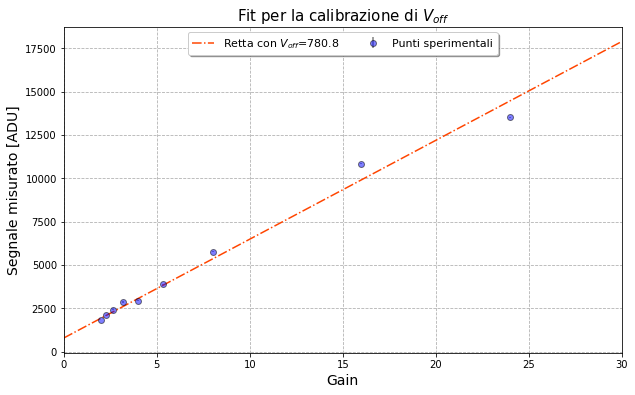

In [3]:
#dataframe
y1=np.asarray([G1[0],G2[0],G3[0],G4[0],G5[0],G6[0],G7[0],G8[0],G9[0]])
x1=np.asarray([2,2.27,2.67,3.2,4,5.33,8,16,24])
yerr=np.asarray([g1[0],g2[0],g3[0],g4[0],g5[0],g6[0],g7[0],g8[0],g9[0]])
print(y1)
#parametri fit

sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
for i in range(0,9):
    sum1+=(yerr[i]**(-2))
for i in range(0,9):
    sum2+=(yerr[i]**(-2))*x1[i]*y1[i]
for i in range(0,9):
    sum3+=(yerr[i]**(-2))*x1[i]
for i in range(0,9):
    sum4+=(yerr[i]**(-2))*x1[i]**2
for i in range(0,9):
    sum5+=(yerr[i]**(-2))*y1[i]
    
xy=(sum2/sum1)
x=sum3/sum1
y=sum5/sum1
x2=sum4/sum1


#parametri retta
m=(xy-x*y)/(x2-x**2)
c=(x2*y-x*xy)/(x2-x**2)

merr=(1/((x2-x**2)*sum1))**0.5
cerr=(merr*x2)**0.5


print('----Parametri Retta----')
print(m,c,merr,cerr)



#plot punti con errori
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(x1,y1 ,yerr, linestyle='none',label='Punti sperimentali', markeredgecolor='black', alpha=0.5,marker='o',color='Blue',  markersize=6 ,ecolor='black')



#plot fit
x2=np.linspace(0,30)
y2=m*x2+c

ax.plot(x2,y2, ls='-.',color='orangered', label='Retta con $V_{off}$=780.8')



#caratteritiche grafico
ax.set_title('Fit per la calibrazione di $V_{off}$', fontsize=15)

  #ax.set_xlim(,)
  #ax.set_ylim(,)

ax.grid(linestyle='--')

ax.set_ylabel('Segnale misurato [ADU]', fontsize=14)
ax.set_xlabel('Gain', fontsize=14)
ax.set_xlim(0,30)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=11, facecolor='white')
plt.show()

# Calibrazione per A

In [4]:
df1 = pd.read_csv('cal ZB=6000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S1=df1.mean()
s1=df1.std()

df2 = pd.read_csv('cal ZB=7000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S2=df2.mean()
s2=df2.std()

df3 = pd.read_csv('cal ZB=8000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S3=df3.mean()
s3=df3.std()

df4 = pd.read_csv('cal ZB=9000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S4=df4.mean()
s4=df4.std()

df5 = pd.read_csv('cal ZB=10000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S5=df5.mean()
s5=df5.std()

df6 = pd.read_csv('cal ZB=11000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S6=df6.mean()
s6=df6.std()

df7 = pd.read_csv('cal ZB=12000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
S7=df7.mean()
s7=df7.std()

----Parametri Retta----
-1.9972432216936762 24577.042712441296 0.001388271697044186 342.2841005266536


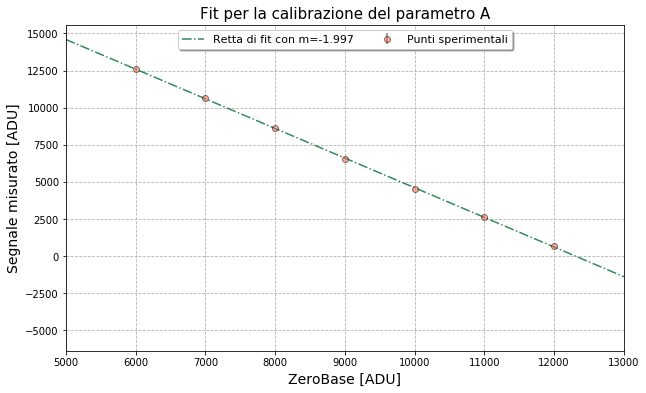

A =  0.04399214144699727
3.0578671741061367e-05
[12632.971428571429, 10625.217391304348, 8594.055555555555, 6555.9655172413795, 4516.962962962963, 2603.346153846154, 691.8125]
[6000, 7000, 8000, 9000, 10000, 11000, 12000]
[7.51267836 7.46819343 6.30100106 6.72672048 7.45489762 7.49871784
 7.20387627]


In [5]:
S=[S1[0],S2[0],S3[0],S4[0],S5[0],S6[0],S7[0]]   
ZB=[6000,7000,8000,9000,10000,11000,12000]  

#print(G)

x1=np.asarray(ZB)
y1=np.asarray(S)

yerr=np.asarray([s1[0],s2[0],s3[0],s4[0],s5[0],s6[0],s7[0]])


sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
for i in range(0,7):
    sum1+=(yerr[i]**(-2))
for i in range(0,7):
    sum2+=(yerr[i]**(-2))*x1[i]*y1[i]
for i in range(0,7):
    sum3+=(yerr[i]**(-2))*x1[i]
for i in range(0,7):
    sum4+=(yerr[i]**(-2))*x1[i]**2
for i in range(0,7):
    sum5+=(yerr[i]**(-2))*y1[i]
    
xy=(sum2/sum1)
x=sum3/sum1
y=sum5/sum1
x2=sum4/sum1

#parametri retta
m=(xy-x*y)/(x2-x**2)
c=(x2*y-x*xy)/(x2-x**2)

merr=(1/((x2-x**2)*sum1))**0.5
cerr=(merr*x2)**0.5


print('----Parametri Retta----')
print(m,c,merr,cerr)



#plot punti con errori
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(x1,y1 ,yerr, linestyle='none',label='Punti sperimentali', markeredgecolor='black', alpha=0.5,marker='o',color='tomato',  markersize=6 ,ecolor='black')



#plot fit
x2=np.linspace(5000,15000)
y2=m*x2+c

ax.plot(x2,y2, ls='-.',color='seagreen', label='Retta di fit con m=-1.997')



#caratteritiche grafico
ax.set_title('Fit per la calibrazione del parametro A', fontsize=15)

ax.set_xlim(5000,13000)

ax.grid(linestyle='--')

ax.set_ylabel('Segnale misurato [ADU]', fontsize=14)
ax.set_xlabel('ZeroBase [ADU]', fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=11, facecolor='white')
plt.show()


A=-m/(20*2.27) #m/(G*gain)
print('A = ',A)

#PROPAGAZIONE ERRORI PER A

sigmaA=merr/(20*2.27)
print(sigmaA)
print(S)
print(ZB)
print(yerr)

In [6]:
A =  0.04399214144699727
Voff = 780.8334237631046
sigmaVoff = 4.838089153054403

# Calibrazione FISICA

In [7]:
#ACQUISISCI I DATI

#FREDDO COLD

df1 = pd.read_csv('g=3_ZB=4330.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad1=df1.mean()
r1=df1.std()

df2 = pd.read_csv('g=4_ZB=4960.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad2=df2.mean()
r2=df2.std()

df3 = pd.read_csv('g=5_ZB=5330.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad3=df3.mean()
r3=df3.std()

df4 = pd.read_csv('g=6_ZB=6210.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad4=df4.mean()
r4=df4.std()

df5 = pd.read_csv('g=8_ZB=7460.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad5=df5.mean()
r5=df5.std()


radC=np.asarray([rad1[0],rad2[0],rad3[0],rad4[0],rad5[0]])
gainC=np.asarray([2.67,3.2,4,5.33,16])
ZBC=np.asarray([4330,4960,5330,6210,7460])
sigmaRC=np.asarray([r1[0],r2[0],r3[0],r4[0],r5[0]])

#HOT

df6 = pd.read_csv('cal g=8 ZB=11700.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad6=df6.mean()
r6=df6.std()

df7 = pd.read_csv('cal g=5 ZB=10000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad7=df7.mean()
r7=df7.std()

df8 = pd.read_csv('cal ZB=9000.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad8=df8.mean()
r8=df8.std()

df9 = pd.read_csv('cal G=3.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad9=df9.mean()
r9=df9.std()

df10 = pd.read_csv('cal G=6.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
rad10=df10.mean()
r10=df10.std()

radH=np.asarray([rad6[0],rad7[0],rad8[0],rad9[0],rad10[0]])
gainH=np.asarray([16,4,2.27,2.67,5.33])
ZBH=np.asarray([11700,10000,9000,11327,11327])
sigmaRH=np.asarray([r6[0],r7[0],r8[0],r9[0],r10[0]])

In [16]:
Gfissato=20 ##RAD VOFF E A da prop
VskyH=(radH-Voff+Gfissato*gainH*A*ZBH)/((1+Gfissato)*gainH)
VskyC=(radC-Voff+Gfissato*gainC*A*ZBC)/((1+Gfissato)*gainC)

VskyHstd=((1/((1+Gfissato)*gainH)*sigmaRH)**2+(-1/((1+Gfissato)*gainH)*sigmaVoff)**2+((Gfissato*gainH*ZBH)/((1+Gfissato)*gainH)*sigmaA)**2)**0.5
VskyCstd=((1/((1+Gfissato)*gainC)*sigmaRC)**2+(-1/((1+Gfissato)*gainC)*sigmaVoff)**2+((Gfissato*gainC*ZBC)/((1+Gfissato)*gainC)*sigmaA)**2)**0.5

print(VskyH.mean(),VskyC.mean())
print(VskyHstd,VskyCstd)

errH=0
errC=0

for i in range (0,5) :
    errH+=VskyHstd[i]**2
    errC+=VskyCstd[i]**2
errH=(errH**0.5)
errC=(errC**0.5)
print(errH)
print(errC)

506.95081651915507 327.0859768648403
[0.35225965 0.32622199 0.31450037 0.36893167 0.36178155] [0.30052197 0.29789968 0.83206389 0.2757798  0.27254522]
0.7722788298903126
1.0108033368686922


In [17]:
Tn2=77.33
Th=273.16+11.8
sigmaTh=0.1

C=(VskyH.mean()-VskyC.mean())/(Th-Tn2) #Propagazione
print(C.mean())
Cstd=(((1/(Th-Tn2))*errH)**2+((-1/(Th-Tn2))*errC)**2+((-(VskyH.mean()-VskyC.mean())/(Th-Tn2)**2)*sigmaTh)**2)**0.5
print(Cstd)

Tsys=(VskyH.mean()/C)-Th #Propagazione per incertezza
print(Tsys.mean())
Tsysstd=(((1/C)*errH)**2+(-(VskyH.mean()/(C**2))*Cstd**2)**2+(-sigmaTh)**2)**0.5
print(Tsysstd)

0.8662757773650953
0.006140763809869225
300.247193558061
0.8974456952509979


# MISURA TEMPERATURA DELLA CMB

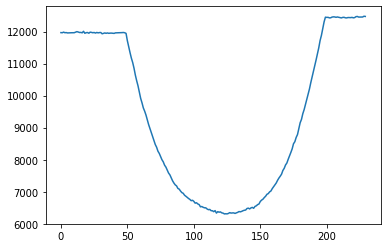

In [10]:
#Acquisizione dati legge della secante

df1 = pd.read_csv('goto p2 gain=5 zb=4130.txt', header=10, usecols=[2], skip_blank_lines=True, sep=' ')
plt.plot(df1)


13264    7539
dtype: int64

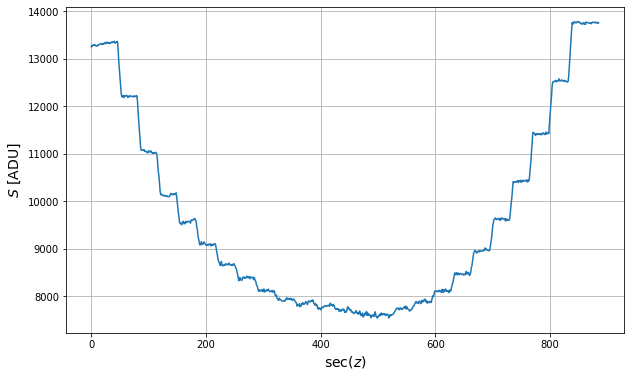

In [22]:
df1 = pd.read_csv('scan30_150_5s g=5 zb=4130.txt', header=9, usecols=[2], skip_blank_lines=True, sep=' ')
df1.min()

[295.18535846 284.22583465 277.70262036 271.94488227 266.87345369
 263.65758068 260.33000131 258.07404893]
[2.36620158 2.         1.7434468  1.55572383 1.41421356 1.30540729
 1.22077459 1.15470054]
[65 60 55 50 45 40 35 30]
[0.31102574 0.28856337 0.35719194 0.28000977 0.21776195 0.22604892
 0.25922963 0.29442016]
secstd = [0.15223007 0.10392305 0.074697   0.05562118 0.04242641 0.032861
 0.02564387 0.02      ]


Text(0.5, 1.0, 'Legge della Secante')

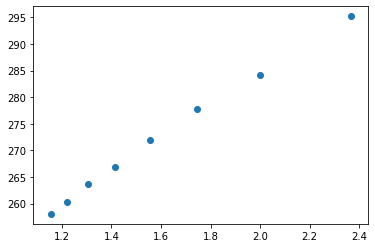

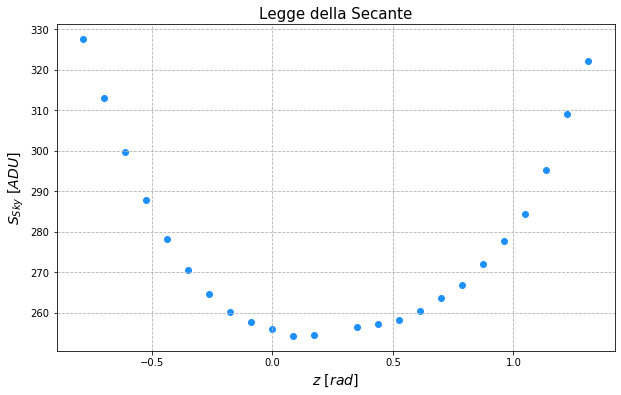

In [40]:
df1 = pd.read_csv('scan30_150_5s g=5 zb=4130.txt', header=9, usecols=[2], skip_blank_lines=True, sep=' ')
#plt.plot(df1)
#plt.xlim(800,900)

d30 = df1[0:41].mean()
d35 = df1[55:75].mean()
d40 = df1[90:110].mean()
d45 = df1[125:145].mean()
d50 = df1[160:180].mean()
d55 = df1[195:215].mean()
d60 = df1[230:250].mean() 
d65 = df1[265:280].mean() 
d70 = df1[295:315].mean()
d75 = df1[330:350].mean() 
d80 = df1[365:385].mean() 
d85 = df1[400:420].mean() 
d90 = df1[430:450].mean() 
d95 = df1[465:485].mean() 
d100 = df1[500:515].mean()  
d105 = df1[530:550].mean() 
d110 = df1[570:590].mean() 
d115 = df1[600:620].mean()
d120 = df1[640:660].mean()
d125 = df1[675:695].mean()
d130 = df1[710:730].mean()
d135 = df1[740:760].mean()
d140 = df1[775:795].mean()
d145 = df1[810:830].mean()
d150 = df1[845:865].mean()


std40 = df1[90:110].std()
std45 = df1[125:145].std()
std50 = df1[160:180].std()
std55 = df1[195:215].std()
std60 = df1[230:250].std()
std65 = df1[265:280].std()
std70 = df1[295:315].std()
std75 = df1[330:350].std()


d=np.asarray([d40[0],d45[0],d50[0],d55[0],d60[0],d65[0],d70[0],d75[0]])
d1=np.asarray([d30[0],d35[0],d40[0],d45[0],d50[0],d55[0],d60[0],d65[0],d70[0],d75[0],d80[0],d85[0],d95[0],d100[0],d105[0],d110[0],d115[0],d120[0],d125[0],d130[0],d135[0],d140[0],d145[0],d150[0]])

sigmad=np.asarray([std40[0],std45[0],std50[0],std55[0],std60[0],std65[0],std70[0],std75[0]])


gain=4
ZB=4130
Ssky=(d-Voff+Gfissato*gain*A*ZB)/((1+Gfissato)*gain)
deg1=np.asarray([30,35,40,45,50,55,60,65,70,75,80,85,95,100,105,110,115,120,125,130,135,140,145,150])

Ssky1=(d1-Voff+Gfissato*gain*A*ZB)/((1+Gfissato)*gain)
#ERRORE SU Ssky

Sskystd=((1/((1+Gfissato)*gain)*sigmad)**2+(-1/((1+Gfissato)*gain)*sigmaVoff)**2+((Gfissato*gain*ZB)/((1+Gfissato)*gain)*sigmaA)**2)**0.5

deg=np.asarray([40,45,50,55,60,65,70,75])



gamma=np.radians(90-deg+15)
gamma1=np.radians(90-deg1+15)

plt.scatter(1/(np.cos(gamma)),Ssky)
print(Ssky)
print(1/(np.cos(gamma)))
print(90-deg+15)
print(Sskystd)

print('secstd =',np.tan(gamma)/np.cos(gamma)*0.03)




fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(gamma1,Ssky1, color='dodgerblue')
ax.grid(ls='--')
ax.set_ylabel('$S_{Sky}$ $[ADU]$', fontsize=14)
ax.set_xlabel('$z$ $[rad]$', fontsize=14)
ax.set_title('Legge della Secante', fontsize=15)


----Parametri Retta----
34.770476037306246 258.905740671095 0.28060217942089843 0.8579199392760753


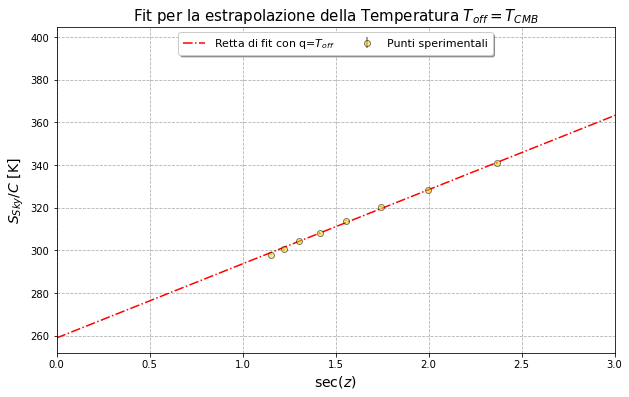

-41.34145288696601


In [13]:
#FIT PER T_CMB


x1=1/(np.cos(gamma))
y1=Ssky/C.mean()

yerr=Sskystd


sum1=0
sum2=0
sum3=0
sum4=0
sum5=0
for i in range(0,7):
    sum1+=(yerr[i]**(-2))
for i in range(0,7):
    sum2+=(yerr[i]**(-2))*x1[i]*y1[i]
for i in range(0,7):
    sum3+=(yerr[i]**(-2))*x1[i]
for i in range(0,7):
    sum4+=(yerr[i]**(-2))*x1[i]**2
for i in range(0,7):
    sum5+=(yerr[i]**(-2))*y1[i]
    
xy=(sum2/sum1)
x=sum3/sum1
y=sum5/sum1
x2=sum4/sum1

#parametri retta
m=(xy-x*y)/(x2-x**2)
c=(x2*y-x*xy)/(x2-x**2)

merr=(1/((x2-x**2)*sum1))**0.5
cerr=(merr*x2)**0.5


print('----Parametri Retta----')
print(m,c,merr,cerr)



#plot punti con errori
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(x1,y1 ,yerr, linestyle='none',label='Punti sperimentali', markeredgecolor='black', alpha=0.5,marker='o',color='gold',  markersize=6 ,ecolor='black')



#plot fit
x2=np.linspace(0,4)
y2=m*x2+c

ax.plot(x2,y2, ls='-.',color='red', label='Retta di fit con q=$T_{off}$')



#caratteritiche grafico
ax.set_title('Fit per la estrapolazione della Temperatura $T_{off}=T_{CMB}$', fontsize=15)

ax.set_xlim(0,3)

ax.grid(linestyle='--')

ax.set_ylabel('$S_{Sky}/C$ [K]', fontsize=14)
ax.set_xlabel('sec($z$)', fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=11, facecolor='white')
plt.show()

print(c-Tsys)